Katarzyna Jodłowska


# Problem 1

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data.to_numpy() / 255.0, mnist.target.to_numpy()
X, _, y, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def perform_knn(X_train, y_train, X_test, k):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    return knn.predict(X_test)


In [ ]:
def bootstrap_knn_single_iteration(X, y, k, n_iters):
    accuracies = []
    for _ in range(n_iters):
        indices = np.random.choice(len(X), size=len(X), replace=True)
        X_train, y_train = X[indices], y[indices]

        mask = np.ones(len(X), dtype=bool)
        mask[indices] = False
        X_test, y_test = X[mask], y[mask]

        y_pred = perform_knn(X_train, y_train, X_test, k)
        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)
    return np.mean(accuracies)


In [ ]:
k_values = range(1, 11)
bootstrap_iterations = [1, 2, 11, 22, 44, 88]

mean_accuracies = {k: [] for k in k_values}
"""
for n_iters in bootstrap_iterations:
    results = bootstrap_knn(X, y, k_values, n_iters)
    for k in k_values:
        mean_accuracy = np.mean(results[k])
        mean_accuracies[k].append(mean_accuracy)
"""
# Równoległe obliczanie dokładności
for n_iters in bootstrap_iterations:
    results = Parallel(n_jobs=-1)(
        delayed(bootstrap_knn_single_iteration)(X, y, k, n_iters) for k in k_values)
    for idx, k in enumerate(k_values):
        mean_accuracies[k].append(results[idx])

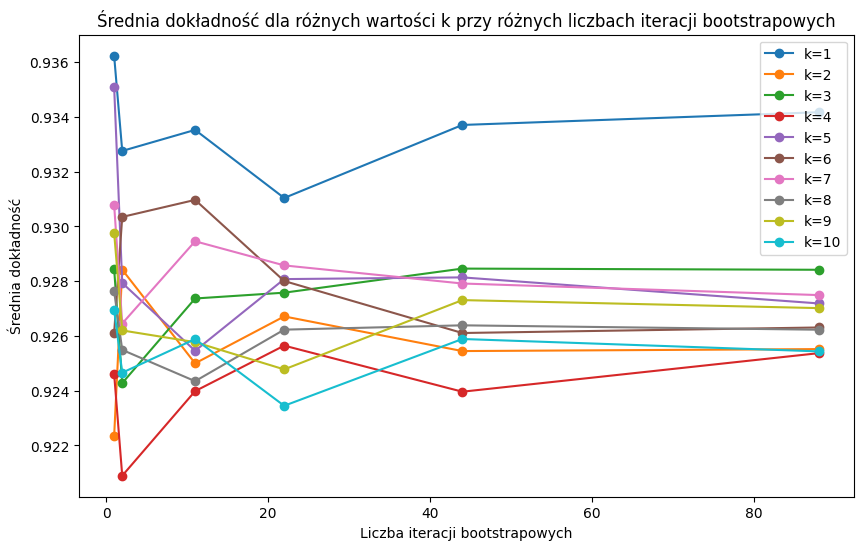

In [ ]:
plt.figure(figsize=(10, 6))
for k in k_values:
    plt.plot(bootstrap_iterations, mean_accuracies[k], label=f'k={k}', marker='o')
plt.xlabel('Liczba iteracji bootstrapowych')
plt.ylabel('Średnia dokładność')
plt.title('Średnia dokładność dla różnych wartości k przy różnych liczbach iteracji bootstrapowych')
plt.legend()
plt.show()

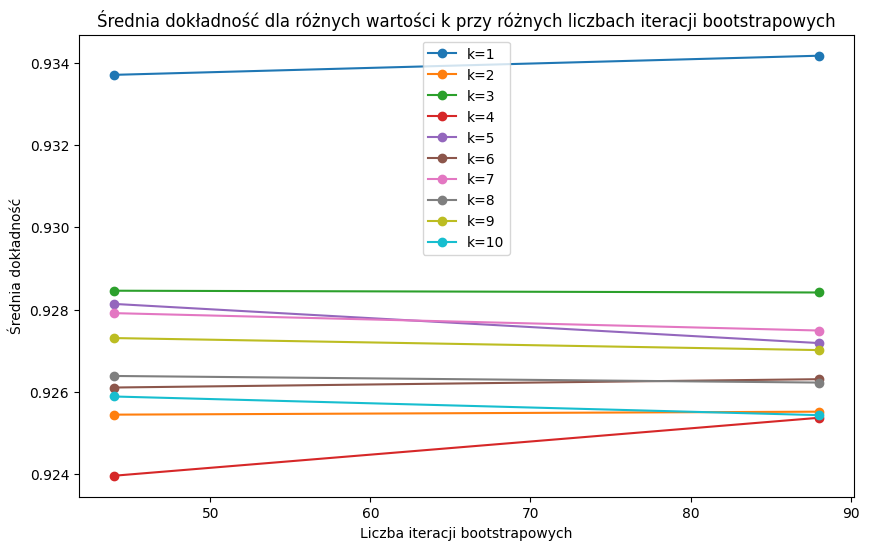

In [ ]:
plt.figure(figsize=(10, 6))
for k in k_values:
    plt.plot(bootstrap_iterations[4:], mean_accuracies[k][4:], label=f'k={k}', marker='o')
plt.xlabel('Liczba iteracji bootstrapowych')
plt.ylabel('Średnia dokładność')
plt.title('Średnia dokładność dla różnych wartości k przy różnych liczbach iteracji bootstrapowych')
plt.legend()
plt.show()

# Problem 2

k = 1, dokładność = 0.9427142857142857
k = 2, dokładność = 0.9317142857142857
k = 3, dokładność = 0.9444285714285714
k = 4, dokładność = 0.9434285714285714
k = 5, dokładność = 0.9431428571428572
k = 6, dokładność = 0.9421428571428572
k = 7, dokładność = 0.9421428571428572
k = 8, dokładność = 0.9377142857142857
k = 9, dokładność = 0.9381428571428572
k = 10, dokładność = 0.9361428571428572
Optymalna wartość k: 3


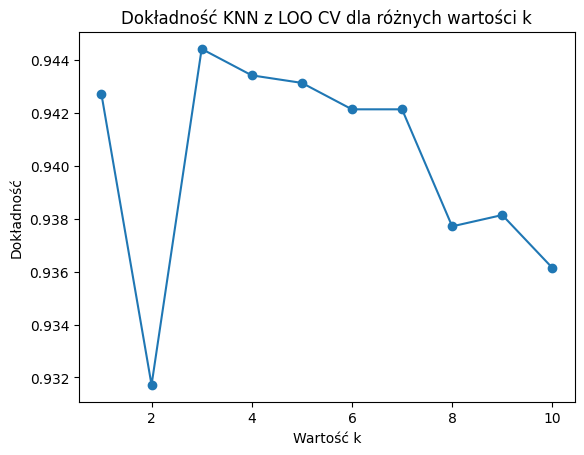

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data.to_numpy() / 255.0, mnist.target.to_numpy()
X, _, y, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)


def perform_knn(X_train, y_train, X_test, k):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    return knn.predict(X_test)


def loo_cross_validation(X, y, k_values):
    loo = LeaveOneOut()
    accuracies = np.zeros(len(k_values))

    for i, k in enumerate(k_values):
        correct_predictions = 0

        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            prediction = perform_knn(X_train, y_train, X_test, k)

            if prediction == y_test:
                correct_predictions += 1

        accuracy = correct_predictions / len(X)
        accuracies[i] = accuracy
        #print(f"k = {k}, dokładność = {accuracy}")

    return accuracies

k_values = range(1, 11)

accuracies = loo_cross_validation(X, y, k_values)

optimal_k = k_values[np.argmax(accuracies)]
print(f"Optymalna wartość k: {optimal_k}")

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Wartość k')
plt.ylabel('Dokładność')
plt.title('Dokładność KNN z LOO CV dla różnych wartości k')
plt.show()

# Problem 3

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

n = 10000
sample = np.random.randn(n, 2)


In [ ]:
k = 1000
Rs = np.zeros(k)

In [ ]:
for j in range(k):
    kmeans = KMeans(n_clusters=3, random_state=None, n_init = 1)
    kmeans.fit(sample)
    centroids = kmeans.cluster_centers_
    norms = np.zeros(3)
    for i,centroid in enumerate(centroids):
        norms[i] = np.sqrt(centroid[0]**2 + centroid[1]**2)
    norms_mean = np.mean(norms)
    Rs[j] = norms_mean


In [ ]:
ns = np.linspace(1, k+1, k)
cumulative_avgs = np.cumsum(Rs) / ns


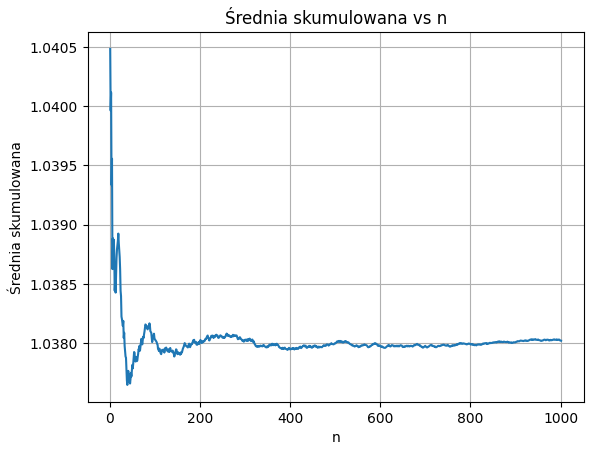

In [ ]:
plt.plot(ns, cumulative_avgs)
plt.title("Średnia skumulowana vs n")
plt.ylabel("Średnia skumulowana")
plt.xlabel("n")
plt.grid(True)
plt.show()

In [ ]:
def empirical_k(k_0):
    k = k_0
    cumulative_avgs = [1]
    precision_threshold = 10**(-9)
    while len(cumulative_avgs) < 2 or abs(cumulative_avgs[-1] - cumulative_avgs[-2]) > precision_threshold:
        k *= 2
        Rs = np.zeros(k)
        for _ in range(k):
            kmeans = KMeans(n_clusters=3, random_state=None, n_init = 1)
            kmeans.fit(sample)
            centroids = kmeans.cluster_centers_
            norms = np.zeros(3)
            for i,centroid in enumerate(centroids):
                norms[i] = np.sqrt(centroid[0]**2 + centroid[1]**2)
            norms_mean = np.mean(norms)
            Rs[i] = norms_mean
        ns = np.linspace(1, k+1, k)
        cumulative_avgs = np.cumsum(Rs) / ns
    return k




In [ ]:
print(empirical_k(300))

38400
